## 1) 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_csv("train.csv")
df['date'] =  pd.to_datetime(df['date'])
df = df.set_index('date')
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [6]:
# store와 item 별로 그룹을 나누고 판매량을 월별로 합산하여 전처리
df = df.groupby(['store', 'item'])['sales'].resample('M').sum()
df = df.reset_index()
df = df.set_index('date')
df

,store,item,sales
date,,,
2013-01-31,1,1,328
2013-02-28,1,1,322
2013-03-31,1,1,477
2013-04-30,1,1,522
2013-05-31,1,1,531
...,...,...,...
2017-08-31,10,50,2867
2017-09-30,10,50,2586
2017-10-31,10,50,2507


In [8]:
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek
split = "2017-01-01"
df

,store,item,sales,month,year,dayofweek
date,,,,,,
2013-01-31,1,1,328,1,2013,3
2013-02-28,1,1,322,2,2013,3
2013-03-31,1,1,477,3,2013,6
2013-04-30,1,1,522,4,2013,1
2013-05-31,1,1,531,5,2013,4
...,...,...,...,...,...,...
2017-08-31,10,50,2867,8,2017,3
2017-09-30,10,50,2586,9,2017,5
2017-10-31,10,50,2507,10,2017,1


In [10]:
# split = "2017-01-01"  기준으로 train / test set 나눔
df_train = df[:split]
df_test = df[split:]

C:\Users\sally\AppData\Local\Temp/ipykernel_36140/4246363243.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_test = df[split:]


In [12]:
df_train

,store,item,sales,month,year,dayofweek
date,,,,,,
2013-01-31,1,1,328,1,2013,3
2013-02-28,1,1,322,2,2013,3
2013-03-31,1,1,477,3,2013,6
2013-04-30,1,1,522,4,2013,1
2013-05-31,1,1,531,5,2013,4
...,...,...,...,...,...,...
2016-08-31,10,50,2842,8,2016,2
2016-09-30,10,50,2568,9,2016,4
2016-10-31,10,50,2495,10,2016,0


In [13]:
df_test

,store,item,sales,month,year,dayofweek
date,,,,,,
2017-01-31,1,1,485,1,2017,1
2017-02-28,1,1,487,2,2017,1
2017-03-31,1,1,561,3,2017,4
2017-04-30,1,1,677,4,2017,6
2017-05-31,1,1,773,5,2017,2
...,...,...,...,...,...,...
2017-08-31,10,50,2867,8,2017,3
2017-09-30,10,50,2586,9,2017,5
2017-10-31,10,50,2507,10,2017,1


### 여기까지 train / test set 만들었다!!!!!!!!!!!!

---

In [11]:
# Y값은 판매량, 나머지 항목들로 X값을 구성
df_train_y = df_train.loc[:,'sales']
df_train_x = df_train.drop('sales', axis=1)

In [23]:
print(df_train_y.shape, df_train_x.shape)

(24000,) (24000, 5)


In [14]:
df_train_y

date
2013-01-31     328
2013-02-28     322
2013-03-31     477
2013-04-30     522
2013-05-31     531
              ... 
2016-08-31    2842
2016-09-30    2568
2016-10-31    2495
2016-11-30    2581
2016-12-31    1922
Name: sales, Length: 24000, dtype: int64

In [15]:
df_train_x

,store,item,month,year,dayofweek
date,,,,,
2013-01-31,1,1,1,2013,3
2013-02-28,1,1,2,2013,3
2013-03-31,1,1,3,2013,6
2013-04-30,1,1,4,2013,1
2013-05-31,1,1,5,2013,4
...,...,...,...,...,...
2016-08-31,10,50,8,2016,2
2016-09-30,10,50,9,2016,4
2016-10-31,10,50,10,2016,0


In [16]:
df_test_y = df_test.loc[:,'sales']
df_test_x = df_test.drop('sales', axis=1)
df_test_orig = df_test.loc[:, ['store', 'item', 'sales']]

In [22]:
print(df_test_x.shape, df_test_y.shape)

(6000, 5) (6000,)


In [18]:
df_test_y

date
2017-01-31     485
2017-02-28     487
2017-03-31     561
2017-04-30     677
2017-05-31     773
              ... 
2017-08-31    2867
2017-09-30    2586
2017-10-31    2507
2017-11-30    2574
2017-12-31    1987
Name: sales, Length: 6000, dtype: int64

In [24]:
df_test_x

,store,item,month,year,dayofweek
date,,,,,
2017-01-31,1,1,1,2017,1
2017-02-28,1,1,2,2017,1
2017-03-31,1,1,3,2017,4
2017-04-30,1,1,4,2017,6
2017-05-31,1,1,5,2017,2
...,...,...,...,...,...
2017-08-31,10,50,8,2017,3
2017-09-30,10,50,9,2017,5
2017-10-31,10,50,10,2017,1


In [17]:
# LSTM 학습을 위해 3차원 배열로 X값을 변형
train_x = np.array(df_train_x).reshape(df_train_x.shape[0], df_train_x.shape[1], 1)
test_x = np.array(df_test_x).reshape(df_test_x.shape[0], df_test_x.shape[1], 1)

- reshape : (df.shape[0] : 행 수 / df.shape[1] : 열 수 / 1???)

 LSTM의 입력은 3차원으로 (samples 수, time step 수, feature 수)인데, <br>time step 수는 하나의 데이터에 들어가는 칼럼 수,<br> feature 수는 몇 개의 low를 한번에 입력할 것인가 정도로 이해하면 편하다.<br><br> 여기서는 5개의 column (year, month, dayofweek, store, item)을 활용하므로 (전체 samples, 5, 1)이 된다.

In [27]:
print(train_x.shape, test_x.shape)

(24000, 5, 1) (6000, 5, 1)


---

## 2) 학습

In [31]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.optimizers import adam_v2
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [32]:
# input shape에 전처리된 train_x의 형태를 넣는다
# 20%로 Drop-out 했다
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128,input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
# 10개의 batch로 100번 epoch 함
history = model.fit(train_x, df_train_y, validation_split=0.1, batch_size=10, epochs=10)

Epoch 1/10
2160/2160 [==============================] - 11s 5ms/step - loss: 1662119.2500 - val_loss: 1898774.0000
Epoch 2/10
2160/2160 [==============================] - 12s 6ms/step - loss: 1247989.0000 - val_loss: 1440808.8750
Epoch 3/10
2160/2160 [==============================] - 13s 6ms/step - loss: 955820.7500 - val_loss: 1120758.5000
Epoch 4/10
2160/2160 [==============================] - 14s 7ms/step - loss: 772305.5625 - val_loss: 906975.2500
Epoch 5/10
2160/2160 [==============================] - 12s 6ms/step - loss: 675988.1250 - val_loss: 787685.8125
Epoch 6/10
2160/2160 [==============================] - 12s 6ms/step - loss: 640217.1875 - val_loss: 735912.4375
Epoch 7/10
2160/2160 [==============================] - 12s 5ms/step - loss: 611630.3750 - val_loss: 711312.4375
Epoch 8/10
2160/2160 [==============================] - 13s 6ms/step - loss: 556412.0000 - val_loss: 628964.1875
Epoch 9/10
2160/2160 [==============================] - 14s 6ms/step - loss: 539301.0000 - 

<AxesSubplot:>

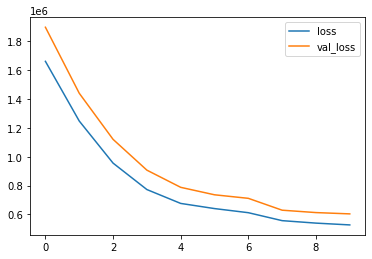

In [36]:
pd.DataFrame.from_dict(history.history).plot()

## 3) 테스트


마련해 두었던 2017년 데이터에서 store와 item을 지정해서 test 해 본다.

In [35]:
df1 = df_test_x[(df_test_x.store==3) & (df_test_x.item==2)]
test_x = np.array(df1).reshape(df1.shape[0], df1.shape[1], 1)
result = model.predict(test_x)

In [37]:
# 그래프로 비교해 보기 위해 결과를 Original Data에 붙임
result_df=pd.concat([df_test_orig[(df_test_orig.store==3)&(df_test_orig.item==2)].reset_index(), 
	pd.DataFrame(result, columns=['lstm'])], axis=1, ignore_index=False)

<AxesSubplot:xlabel='date'>

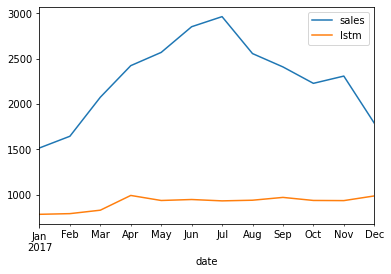

In [38]:
# 결과에서 date를 x축으로 실측 sales와 lstm의 결과를 y로 두고 비교
result_df.set_index('date').loc[:, ['sales', 'lstm']].plot()